## Практическое задание 5. Квадратуры Гаусса

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def lagrange_poly(x, P, i):
    res = 1
    for j in range(len(P)):
        if j != i:
            res *= (x - P[j]) / (P[i] - P[j])
    return res


def integrate_lagrange(f, a, b, n, show_error=False):
    # Calculate knots
    nr = np.arange(1, n)
    A = np.diag(nr / (2 * nr + 1), k=-1) + np.diag(nr / (2 * (nr - 1) + 1), k=1)
    points = np.linalg.eig(A)[0]
    points.sort()
    
    # Calculate weights
    weights = np.zeros(n)
    
    for i in range(n):
        l_i = lambda x: lagrange_poly(x, points, i)
        weights[i] = integrate.quad(l_i, -1, 1)[0]
    
    # Scale from [-1, 1] to [a, b]
    points = (points + 1) * (b - a) / 2 + a
    
    if show_error:
        # Compare with leggauss()
        points_true, weights_true = np.polynomial.legendre.leggauss(n)
        points_true = (points_true + 1) * (b - a) / 2 + a
        print(f'Knots error: {np.linalg.norm(points - points_true):.3},\nWeights error: {np.linalg.norm(weights - weights_true):.3}')
    
    return np.sum(weights * f(points)) * (b - a) / 2

Проверим, что квадратура на $n$ узлах алгебраически точна для многочленов степени ниже чем $2n-1$

In [3]:
def test_1(f, a, b, n):
    res = integrate_lagrange(f, a, b, n, True)
    res_true = integrate.quad(f, a, b)[0]
    print(f'\nGauss: {res}\n' +
          f'True : {res_true}\n' +
          f'\nIntegration error: {np.linalg.norm(res - res_true)}')

Многочлен степени 4

In [4]:
def f(x):
    return x ** 4 + 5 * x ** 3 - 19 * x ** 2 + 5 * x + 2

При $n < 3$ результат некорректный

In [5]:
test_1(f, 0, 10, 2)

Knots error: 4.44e-16,
Weights error: 2.48e-16

Gauss: 25881.111111111113
True : 26436.666666666664

Integration error: 555.5555555555511


При $n \geqslant 3$ результат точный

In [6]:
test_1(f, 0, 10, 3)

Knots error: 1.11e-15,
Weights error: 4.71e-16

Gauss: 26436.666666666675
True : 26436.666666666664

Integration error: 1.0913936421275139e-11


In [7]:
np.random.seed(0)

def get_rand_poly(n):
    a = np.random.uniform(-100, 100, n)
    p = np.arange(n)
    
    def p(x):
        res = 0
        for i in range(n):
            res += a[i] * x ** i
        return res
    
    return p
#     return lambda X: [np.sum(x ** p * a) for x in X]

Еще пример на границе точности

In [8]:
f = get_rand_poly(11)
test_1(f, -5, 2, 6)
print('\n')
test_1(f, -5, 2, 5)

Knots error: 4.72e-15,
Weights error: 4.1e-15

Gauss: 297843080.3475052
True : 297843080.3475054

Integration error: 1.7881393432617188e-07


Knots error: 1.78e-15,
Weights error: 1.23e-15

Gauss: 297677926.62221277
True : 297843080.3475054

Integration error: 165153.72529262304


Проверим зависимость точности от числа узлов

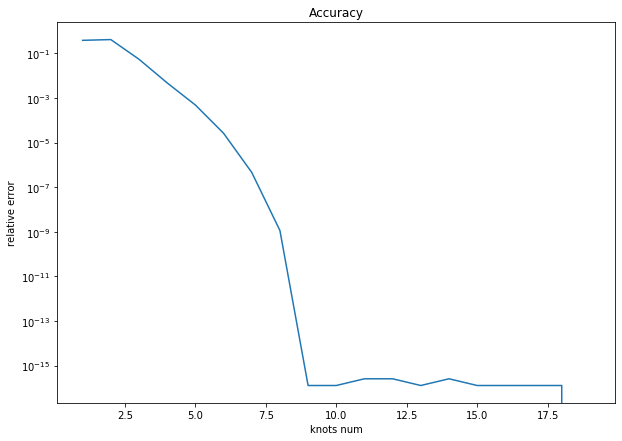

In [9]:
def get_accuracy(f, a, b, n):
    res = integrate_lagrange(f, a, b, n)
    res_true = integrate.quad(f, a, b)[0]
    return np.abs((res - res_true) / res_true)


def test_2(f, N):
    nr = np.arange(1, N)
    accuracy = [get_accuracy(f, 0, 1, n) for n in nr]
    
    plt.figure(figsize=(10, 7))
    plt.plot(nr, accuracy)
    plt.yscale('log')
    plt.title('Accuracy')
    plt.xlabel('knots num')
    plt.ylabel('relative error')
    

test_2(get_rand_poly(17), 20)

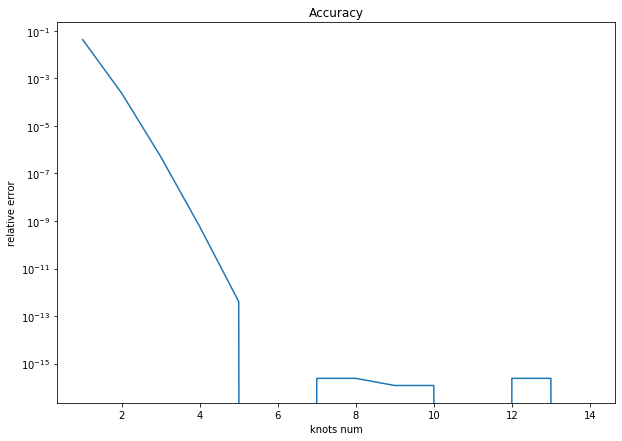

In [10]:
test_2(lambda x: np.sin(x), 15)

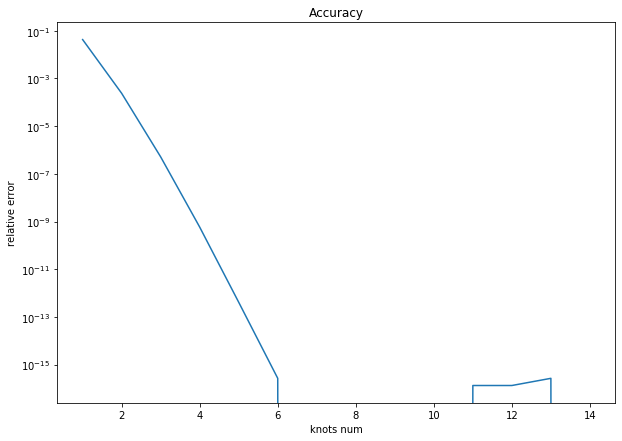

In [11]:
test_2(lambda x: np.cos(x), 15)